# Reto / Instrucciones

Con el archivo listings.csv, construye un módelo en python que nos permita preguntarle cualquier cosa al data set.
- Ejemplo: ¿Cuál es el precio promedio de los departamentos en venta?
- Respuesta: El precio promedio de los departamentos en venta es de 2.5 millones


Notas: Aunque se pueden utilizar modelos de lenguaje privados, preferimos soluciones que utilicen modelos de lenguaje open source.
  - Bonus points: Entregar reto montado en una API




---


# **Descripcion de las tareas que voy a realizar**

Para desarrollar un modelo en Python que me permita realizar consultas sobre el dataset proporcionado (en este caso, listings.csv), seguiré varios pasos. Utilizaré herramientas de código abierto para el análisis y construcción del modelo. Finalmente, expondré el modelo a través de una API sencilla.

Los pasos que seguiré son los siguientes:

1. **Análisis Preliminar del Dataset**
  - Primero, necesito entender la estructura y el contenido del archivo listings.csv. Para esto, cargaré el archivo y visualizaré las primeras filas.

2. **Limpieza y Preparación de Datos**
  - Dependiendo de la estructura y calidad de los datos, puede ser necesario realizar limpieza y transformaciones, como tratar valores faltantes, normalizar textos, convertir tipos de datos, etc.

3. **Desarrollo del Modelo para Consultas**
  - Para permitir consultas como el precio promedio, utilizaré funciones de Pandas para calcular estadísticas descriptivas. No es necesario un modelo de aprendizaje automático para este tipo de consultas. Usare un chatbot de tipo if/else.

4. **Probar chatbot**

.

A. **Probar un modelo preentrenado (BERT)**

B. **Creación de la API** (Si alcanza el tiempo)
  - Utilizaré Flask, un micro framework de Python, para exponer mi modelo como una API.







---
# **Para probar el chatbot corre el codigo y revisa el funcionamiento en la seccion 4.**

---
- Nota: es necesario importar la data, yo use Google Colab y tenia los documentos en Drive.




---

# 1) **Análisis Preliminar del Dataset**

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [115]:
!pip install transformers

In [116]:
pip install transformers torch

In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn

from transformers import BertTokenizer, BertForQuestionAnswering
import torch

from transformers import AutoModelForQuestionAnswering, AutoTokenizer
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast

## Data

🛑 Modifica el file_path para cargar el archivo

In [49]:
# Cargando la data
file_path = '/content/drive/MyDrive/Colab Notebooks/OtherNotebooks/DD360/listings.csv'
df = pd.read_csv(file_path, na_values='NaN')

# Agregando la columna 'price_sqm' que representa el precio por metro cuadrado
df['price_sqm'] = df['last_price'] / df['surface_total']

# df.head()
df

,id,listing_type,property_type,last_price,num_bedrooms,num_bathrooms,has_pool,has_terrace,surface_total,price_sqm
0,e2822ddf152f4842c29395ab9c8e379e,for-sale,apartment,4700000.0,2.0,1.0,NaN,NaN,101.0,46534.653465
1,0ba1c9fd7d004b87e118a94c0b1571dd,for-sale,apartment,7200000.0,2.0,2.0,NaN,1.0,70.0,102857.142857
2,0b2fc13289ffcfad80c52b6e1c88e2c6,for-sale,apartment,7500000.0,2.0,2.0,NaN,1.0,81.0,92592.592593
3,0d2b88624583c00a369b43028a9b63e6,for-sale,apartment,6600000.0,3.0,2.0,NaN,NaN,136.0,48529.411765
4,0d52ff8d810d19c4665e9c5a0e287816,for-sale,apartment,5600000.0,2.0,2.0,NaN,1.0,87.0,64367.816092
...,...,...,...,...,...,...,...,...,...,...
3281,d74825c4daec636aeeedb01231302fab,for-sale,apartment,9500000.0,3.0,2.0,NaN,1.0,170.0,55882.352941
3282,67d54869e7ad2d3f1ec95b4f0d4c543f,for-rent,apartment,49410.0,2.0,2.0,NaN,NaN,77.0,641.688312
3283,7eaae90e38ff9780884203e95a4f554a,for-sale,apartment,7300000.0,2.0,2.0,NaN,1.0,100.0,73000.000000
3284,9150e52d2867abc80efc6b1324e8e85c,for-rent,apartment,35152.0,3.0,2.0,NaN,NaN,106.0,331.622642


In [50]:
# Cambiando 'NaN' a 0 en las columnas 'has_pool' y 'has_terrace'
df['has_pool'] = df['has_pool'].fillna(0)
df['has_terrace'] = df['has_terrace'].fillna(0)

# Descriptive statistics for the dataset
descriptive_stats = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()

# Data types
data_types = df.dtypes

# (descriptive_stats, missing_values, data_types)
print("\nEstadisticas Descriptivas: \n \n", descriptive_stats)
print("\n---------------------------------------------------------------------------")
print("\nMissing values: ", missing_values)
print("\n---------------------------------------------------------------------------")
print("\nTipos de datos: ", data_types)


Estadisticas Descriptivas: 
 
          last_price  num_bedrooms  num_bathrooms     has_pool  has_terrace  \
count  3.286000e+03   3206.000000    3211.000000  3286.000000  3286.000000   
mean   6.041312e+06      2.015908       1.844285     0.062082     0.562386   
std    6.906524e+06      0.935383       0.822132     0.241340     0.496168   
min    8.500000e+03      0.000000       0.000000     0.000000     0.000000   
25%    2.991751e+06      2.000000       1.000000     0.000000     0.000000   
50%    5.015498e+06      2.000000       2.000000     0.000000     1.000000   
75%    7.950000e+06      2.000000       2.000000     0.000000     1.000000   
max    1.016639e+08      9.000000       9.000000     1.000000     1.000000   

       surface_total      price_sqm  
count    3286.000000    3286.000000  
mean      111.625962   55431.739593  
std        82.311417   34081.567585  
min        30.000000     189.655172  
25%        65.000000   43113.772455  
50%        95.000000   64402.138815  

## Análisis de Datos

Casas:  173
Venta:  150
Renta:  23

Departamentos:  3113
Venta:  2364
Renta:  749


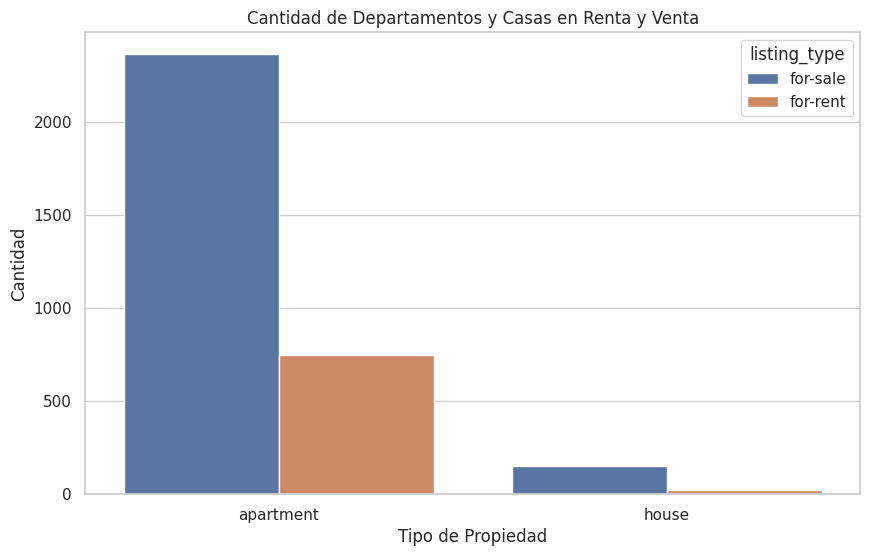

In [51]:
# Contando el número de departamentos en renta y los que están en venta
num_departamentos_renta = df[df['listing_type'] == 'for-rent']['property_type'].eq('apartment').sum()
num_departamentos_venta = df[df['listing_type'] == 'for-sale']['property_type'].eq('apartment').sum()

# Contando el número de casas en renta y los que están en venta
num_casas_renta = df[df['listing_type'] == 'for-rent']['property_type'].eq('house').sum()
num_casas_venta = df[df['listing_type'] == 'for-sale']['property_type'].eq('house').sum()

# Contando el número de casas en el dataset
num_casas = df['property_type'].eq('house').sum()
num_depas = df['property_type'].eq('apartment').sum()

print("Casas: ", num_casas)
print("Venta: ", num_casas_venta)
print("Renta: ", num_casas_renta)

print("\nDepartamentos: ", num_depas)
print("Venta: ", num_departamentos_venta)
print("Renta: ", num_departamentos_renta)


# Número de propiedades en renta y en venta
total_renta = df[df['listing_type'] == 'for-rent'].shape[0]
total_venta = df[df['listing_type'] == 'for-sale'].shape[0]

# Número de propiedades con alberca
total_con_alberca = df[df['has_pool'] > 0].shape[0]

# Número de propiedades con terraza
total_con_terraza = df[df['has_terrace'] > 0].shape[0]

# Gráfica para visualizar la cantidad de departamentos y casas según estén a la renta o a la venta
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='property_type', hue='listing_type')
plt.title('Cantidad de Departamentos y Casas en Renta y Venta')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.show()

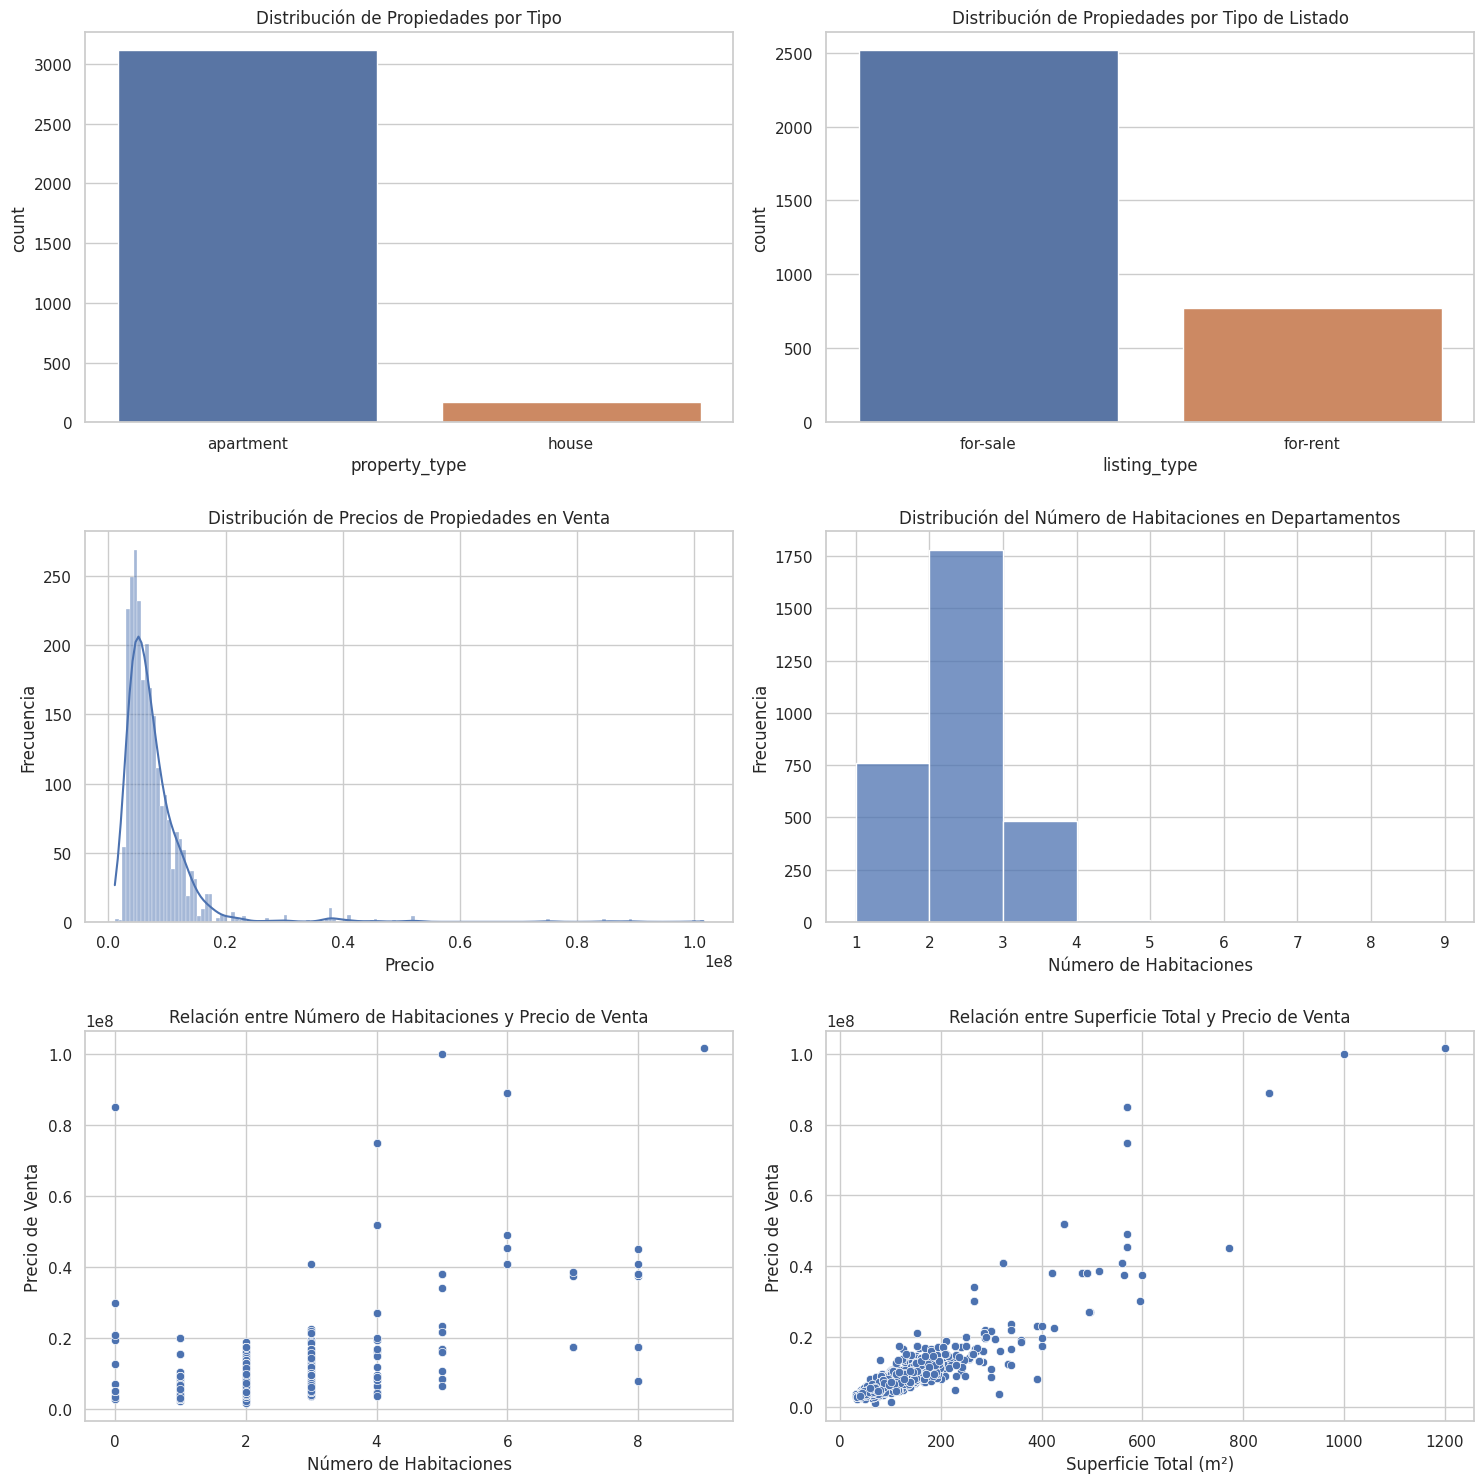

In [15]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Gráfica 1: Distribución de propiedades por tipo (Casa o Departamento)
sns.countplot(data=df, x='property_type', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Propiedades por Tipo')

# Gráfica 2: Distribución de propiedades por tipo de listado (Venta o Renta)
sns.countplot(data=df, x='listing_type', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Propiedades por Tipo de Listado')

# Gráfica 3: Precio de las propiedades en venta
sns.histplot(df[df['listing_type'] == 'for-sale']['last_price'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Precios de Propiedades en Venta')
axes[1, 0].set(xlabel='Precio', ylabel='Frecuencia')

# Gráfica 4: Distribución del número de habitaciones en departamentos
sns.histplot(df[df['property_type'] == 'apartment']['num_bedrooms'], bins=range(1, 10), kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Distribución del Número de Habitaciones en Departamentos')
axes[1, 1].set(xlabel='Número de Habitaciones', ylabel='Frecuencia')

# Gráfica 5: Relación entre el número de habitaciones y el precio de venta
sns.scatterplot(data=df[df['listing_type'] == 'for-sale'], x='num_bedrooms', y='last_price', ax=axes[2, 0])
axes[2, 0].set_title('Relación entre Número de Habitaciones y Precio de Venta')
axes[2, 0].set(xlabel='Número de Habitaciones', ylabel='Precio de Venta')

# Gráfica 6: Relación entre la superficie total y el precio de venta
sns.scatterplot(data=df[df['listing_type'] == 'for-sale'], x='surface_total', y='last_price', ax=axes[2, 1])
axes[2, 1].set_title('Relación entre Superficie Total y Precio de Venta')
axes[2, 1].set(xlabel='Superficie Total (m²)', ylabel='Precio de Venta')

plt.tight_layout()
plt.show()




---



# **2) Limpieza y Preparación de Datos**





## Preprocessing

In [52]:
# var_drop = ['property_id'] # Suponemos que property_id no es relevante para este caso
# df.drop(var_drop, axis=1, inplace=True)

# Verificando los cambios
df.head()

,id,listing_type,property_type,last_price,num_bedrooms,num_bathrooms,has_pool,has_terrace,surface_total,price_sqm
0,e2822ddf152f4842c29395ab9c8e379e,for-sale,apartment,4700000.0,2.0,1.0,0.0,0.0,101.0,46534.653465
1,0ba1c9fd7d004b87e118a94c0b1571dd,for-sale,apartment,7200000.0,2.0,2.0,0.0,1.0,70.0,102857.142857
2,0b2fc13289ffcfad80c52b6e1c88e2c6,for-sale,apartment,7500000.0,2.0,2.0,0.0,1.0,81.0,92592.592593
3,0d2b88624583c00a369b43028a9b63e6,for-sale,apartment,6600000.0,3.0,2.0,0.0,0.0,136.0,48529.411765
4,0d52ff8d810d19c4665e9c5a0e287816,for-sale,apartment,5600000.0,2.0,2.0,0.0,1.0,87.0,64367.816092


In [54]:
missing_values = df.isnull().sum()
data_types = df.dtypes

print("\nMissing values: ", missing_values)
print("\nTipos de datos: ", data_types)


Missing values:  id                0
listing_type      0
property_type     0
last_price        0
num_bedrooms     80
num_bathrooms    75
has_pool          0
has_terrace       0
surface_total     0
price_sqm         0
dtype: int64

Tipos de datos:  id                object
listing_type      object
property_type     object
last_price       float64
num_bedrooms     float64
num_bathrooms    float64
has_pool         float64
has_terrace      float64
surface_total    float64
price_sqm        float64
dtype: object


In [55]:
# Dropping missing values
df = df.dropna()

In [56]:
# One-Hot encoding para las columnas listing_type y property_type

cat_var = ['listing_type', 'property_type']

# One-hot encoding training
encoded_columns = pd.get_dummies(df[cat_var], drop_first=False)
# Adding the one-hot encoded columns to the original DataFrame
enco_df = pd.concat([df, encoded_columns], axis=1)
# Drop the original columns that were one-hot encoded
enco_df.drop(cat_var, axis=1, inplace=True)

enco_df

,id,last_price,num_bedrooms,num_bathrooms,has_pool,has_terrace,surface_total,price_sqm,listing_type_for-rent,listing_type_for-sale,property_type_apartment,property_type_house
0,e2822ddf152f4842c29395ab9c8e379e,4700000.0,2.0,1.0,0.0,0.0,101.0,46534.653465,0,1,1,0
1,0ba1c9fd7d004b87e118a94c0b1571dd,7200000.0,2.0,2.0,0.0,1.0,70.0,102857.142857,0,1,1,0
2,0b2fc13289ffcfad80c52b6e1c88e2c6,7500000.0,2.0,2.0,0.0,1.0,81.0,92592.592593,0,1,1,0
3,0d2b88624583c00a369b43028a9b63e6,6600000.0,3.0,2.0,0.0,0.0,136.0,48529.411765,0,1,1,0
4,0d52ff8d810d19c4665e9c5a0e287816,5600000.0,2.0,2.0,0.0,1.0,87.0,64367.816092,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3281,d74825c4daec636aeeedb01231302fab,9500000.0,3.0,2.0,0.0,1.0,170.0,55882.352941,0,1,1,0
3282,67d54869e7ad2d3f1ec95b4f0d4c543f,49410.0,2.0,2.0,0.0,0.0,77.0,641.688312,1,0,1,0
3283,7eaae90e38ff9780884203e95a4f554a,7300000.0,2.0,2.0,0.0,1.0,100.0,73000.000000,0,1,1,0
3284,9150e52d2867abc80efc6b1324e8e85c,35152.0,3.0,2.0,0.0,0.0,106.0,331.622642,1,0,1,0


# 3) Modelo

In [58]:
#  modelo multilingüe BERT
model_name = 'bert-base-multilingual-cased'

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForQuestionAnswering.from_pretrained(model_name)


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Reglas y consultas

In [117]:
# Interpreta la pregunta y decide el tipo de consulta realizar
def consulta_dataset(pregunta):
    pregunta = pregunta.lower()  # Convertir la pregunta a minúsculas para la comparación
    nu_casas = df['property_type'].eq('house').sum()
    nu_depas = df['property_type'].eq('apartment').sum()

    # Numero de habitaciones por casa
    num_casas_1_habitacion = df[(df['property_type'] == 'house') & (df['num_bedrooms'] == 1)].shape[0]
    num_casas_2_habitaciones = df[(df['property_type'] == 'house') & (df['num_bedrooms'] == 2)].shape[0]
    num_casas_3_habitaciones = df[(df['property_type'] == 'house') & (df['num_bedrooms'] == 3)].shape[0]
    num_casas_4_habitaciones = df[(df['property_type'] == 'house') & (df['num_bedrooms'] == 4)].shape[0]
    num_casas_5_habitaciones = df[(df['property_type'] == 'house') & (df['num_bedrooms'] == 5)].shape[0]

    # Numero de habitaciones por departamento
    num_deptos_1_habitacion = df[(df['property_type'] == 'apartment') & (df['num_bedrooms'] == 1)].shape[0]
    num_deptos_2_habitaciones = df[(df['property_type'] == 'apartment') & (df['num_bedrooms'] == 2)].shape[0]
    num_deptos_3_habitaciones = df[(df['property_type'] == 'apartment') & (df['num_bedrooms'] == 3)].shape[0]
    num_deptos_4_habitaciones = df[(df['property_type'] == 'apartment') & (df['num_bedrooms'] == 4)].shape[0]
    num_deptos_5_habitaciones = df[(df['property_type'] == 'apartment') & (df['num_bedrooms'] == 5)].shape[0]

    # Calculando el promedio de habitaciones para casas y departamentos en renta y venta
    promedio_habitaciones_casas_venta = df[(df['property_type'] == 'house') & (df['listing_type'] == 'for-sale')]['num_bedrooms'].mean()
    promedio_habitaciones_casas_renta = df[(df['property_type'] == 'house') & (df['listing_type'] == 'for-rent')]['num_bedrooms'].mean()
    promedio_habitaciones_deptos_venta = df[(df['property_type'] == 'apartment') & (df['listing_type'] == 'for-sale')]['num_bedrooms'].mean()
    promedio_habitaciones_deptos_renta = df[(df['property_type'] == 'apartment') & (df['listing_type'] == 'for-rent')]['num_bedrooms'].mean()

    # Calculando el precio promedio de una casa y de un departamento
    precio_promedio_casa = df[df['property_type'] == 'house']['last_price'].mean()
    precio_promedio_departamento = df[df['property_type'] == 'apartment']['last_price'].mean()

    # Calculando el precio promedio de casas y departamentos, tanto en venta como en renta
    precio_promedio_casas_venta = df[(df['property_type'] == 'house') & (df['listing_type'] == 'for-sale')]['last_price'].mean()
    precio_promedio_casas_renta = df[(df['property_type'] == 'house') & (df['listing_type'] == 'for-rent')]['last_price'].mean()
    precio_promedio_deptos_venta = df[(df['property_type'] == 'apartment') & (df['listing_type'] == 'for-sale')]['last_price'].mean()
    precio_promedio_deptos_renta = df[(df['property_type'] == 'apartment') & (df['listing_type'] == 'for-rent')]['last_price'].mean()

    # Promedio de baños para casas y departamentos
    promedio_banos_casa = df[df['property_type'] == 'house']['num_bathrooms'].mean()
    promedio_banos_departamento = df[df['property_type'] == 'apartment']['num_bathrooms'].mean()

    # propiedades
    if 'cuántas propiedades están listadas' in pregunta or 'cuantas propiedades hay'in pregunta:
        total_listadas = df.shape[0]
        return f"Hay {total_listadas} propiedades listadas. De las cuales hay {nu_casas} casas y {nu_depas} departamentos."


#####
    # Casas
    elif 'cuántas casas estan listadas' in pregunta or 'cuantas casas hay'in pregunta:
        casas_venta = df[(df['listing_type'] == 'for-sale') & (df['property_type'] == 'house')].shape[0]
        casas_renta = df[(df['listing_type'] == 'for-rent') & (df['property_type'] == 'house')].shape[0]
        return f"Hay {nu_casas} casas. De las cuales hay {casas_venta} en venta y {casas_renta} en renta."
    elif 'casas estan en venta' in pregunta:
        casas_venta = df[(df['listing_type'] == 'for-sale') & (df['property_type'] == 'apartment')].shape[0]
        return f"Hay {casas_venta} casas en venta."
    elif 'casas estan en renta' in pregunta:
        casas_renta = df[(df['listing_type'] == 'for-rent') & (df['property_type'] == 'apartment')].shape[0]
        return f"Hay {casas_renta} casas en renta."

    elif 'promedio de habitaciones en las casas en venta' in pregunta:
        return f"El promedio de habitaciones en las casas en venta es de {promedio_habitaciones_casas_venta:.2f}."
    elif 'promedio de habitaciones en las casas  en renta' in pregunta:
        return f"El promedio de habitaciones en las casas  en renta es de {promedio_habitaciones_casas_renta:.2f}."

    elif 'casas con 1 habitacion' in pregunta or 'casas tienen 1 habitacion' in pregunta:
        return f"Hay {num_casas_1_habitacion:.2f} casas con 1 habitacion."
    elif 'casas con 2 habitaciones' in pregunta or 'casas tienen 2 habitaciones' in pregunta:
        return f"Hay {num_casas_2_habitaciones:.2f} casas con 2 habitaciones."
    elif 'casas con 3 habitaciones' in pregunta or 'casas tienen 3 habitaciones' in pregunta:
        return f"Hay {num_casas_3_habitaciones:.2f} casas con 3 habitaciones."
    elif 'casas con 4 habitaciones' in pregunta or 'casas tienen 4 habitaciones' in pregunta:
        return f"Hay {num_casas_4_habitaciones:.2f} casas con 4 habitaciones."
    elif 'casas con 5 habitaciones' in pregunta or 'casas tienen 5 habitaciones' in pregunta:
        return f"Hay {num_casas_5_habitaciones:.2f} casas con 5 habitaciones."


    elif 'precio promedio de una casa en renta'in pregunta:
        return f"El precio promedio de una casa en renta es de {precio_promedio_casas_renta:.2f}."
    elif 'precio promedio de una casa en venta'in pregunta:
        return f"El precio promedio de una casa en venta es de {precio_promedio_casas_venta:.2f}."

    elif 'precio promedio de una casa' in pregunta:
        return f"El precio promedio de una casa es {precio_promedio_casa:.2f}."

#####
    # Departamentos
    elif 'cuántos departamentos estan listadas' in pregunta or 'cuantos departamentos hay'in pregunta:
        # nu_depas = df['property_type'].eq('apartment').sum()
        deptos_venta = df[(df['listing_type'] == 'for-sale') & (df['property_type'] == 'apartment')].shape[0]
        deptos_renta = df[(df['listing_type'] == 'for-rent') & (df['property_type'] == 'apartment')].shape[0]
        return f"Hay {nu_depas} departamentos. De los cuales hay {deptos_venta} en venta y {deptos_renta} en renta."
    elif 'departamentos estan en venta' in pregunta:
        deptos_venta = df[(df['listing_type'] == 'for-sale') & (df['property_type'] == 'apartment')].shape[0]
        return f"Hay {deptos_venta} departamentos en venta."
    elif 'departamentos estan en renta' in pregunta:
        deptos_renta = df[(df['listing_type'] == 'for-rent') & (df['property_type'] == 'apartment')].shape[0]
        return f"Hay {deptos_renta} departamentos en renta."

    elif 'promedio de habitaciones en los departamentos en venta' in pregunta:
        promedio_habitaciones_depa_venta = df[df['listing_type'] == 'for-sale']['num_bedrooms'].mean()
        return f"El promedio de habitaciones en departamentos en venta es de {promedio_habitaciones_deptos_venta:.2f}."
    elif 'promedio de habitaciones en los departamentos en renta' in pregunta:
        promedio_habitaciones_depa_renta = df[df['listing_type'] == 'for-rent']['num_bedrooms'].mean()
        return f"El promedio de habitaciones en departamentos en renta es de {promedio_habitaciones_deptos_renta:.2f}."
    elif 'precio promedio de un departamento' in pregunta:
        precio_promedio = df['last_price'].mean()
        return f"El precio promedio de un departamento {precio_promedio_departamento:.2f}"

    elif 'departamentos con 1 habitacion' in pregunta or 'departamentos tienen 1 habitacion' in pregunta:
        return f"Hay {num_deptos_1_habitacion:.2f} departamentos con 1 habitacion."
    elif 'departamentos con 2 habitaciones' in pregunta or 'departamentos tienen 2 habitaciones' in pregunta:
        return f"Hay {num_deptos_2_habitaciones:.2f} departamentos con 2 habitaciones."
    elif 'departamentos con 3 habitaciones' in pregunta or 'departamentos tienen 3 habitaciones' in pregunta:
        return f"Hay {num_deptos_3_habitaciones:.2f} departamentos con 3 habitaciones."
    elif 'departamentos con 4 habitaciones' in pregunta or 'departamentos tienen 4 habitaciones' in pregunta:
        return f"Hay {num_deptos_4_habitaciones:.2f} departamentos con 4 habitaciones."
    elif 'departamentos con 5 habitaciones' in pregunta or 'departamentos tienen 5 habitaciones' in pregunta:
        return f"Hay {num_deptos_5_habitaciones:.2f} departamentos con 5 habitaciones."

    elif 'precio promedio de un departamento en renta'in pregunta:
        return f"El precio promedio de un departamento en renta es de {precio_promedio_departamento_renta:.2f}."
    elif 'precio promedio de un departamento en venta'in pregunta:
        return f"El precio promedio de un departamento en venta es de {precio_promedio_departamento_venta:.2f}."

    elif 'precio promedio de un departamento' in pregunta:
        return f"El precio promedio de un departamento es {precio_promedio_departamento:.2f}."


    # alberca
    elif 'propiedades tienen piscina' in pregunta or 'propiedades tienen alberca' in pregunta:
        cantidad_con_piscina = df[df['has_pool'] == 1].shape[0]
        casas_con_alberca = df[(df['property_type'] == 'house') & (df['has_pool'] == 1)].shape[0]
        departamentos_con_alberca = df[(df['property_type'] == 'apartment') & (df['has_pool'] == 1)].shape[0]
        return f"Hay {cantidad_con_piscina} propiedades con alberca. Las cuales estan en {casas_con_alberca} casas y {departamentos_con_alberca} departamentos."
    elif 'properties have a pool' in pregunta:
        cantidad_con_piscina = df[df['has_pool'] == 1].shape[0]
        return f"There are {cantidad_con_piscina} properties with a pool."


    # terraza
    elif 'propiedades tienen terraza' in pregunta or 'terrazas hay' in pregunta:
        con_terraza = df[df['has_terrace'] == 1].shape[0]
        casas_con_terraza = df[(df['property_type'] == 'house') & (df['has_terrace'] == 1)].shape[0]
        departamentos_con_terraza = df[(df['property_type'] == 'apartment') & (df['has_terrace'] == 1)].shape[0]
        return f"Hay {con_terraza} propiedades con terraza. Las cuales estan en {casas_con_terraza} casas y {departamentos_con_terraza} departamentos."
    elif 'properties have a terrace' in pregunta:
        con_terraza = df[df['has_terrace'] == 1].shape[0]
        return f"Their are {con_terraza} properties with a terrace."

    # rango precio
    elif 'rango de precios' in pregunta:
        precio_min = df['last_price'].min()
        precio_max = df['last_price'].max()
        return f"Los precios de las propiedades van desde {precio_min} hasta {precio_max}."
    elif 'range of prices' in pregunta:
        precio_min = df['last_price'].min()
        precio_max = df['last_price'].max()
        return f"The property price range from {precio_min} to {precio_max}."

    elif 'superficie promedio de los departamentos' in pregunta:
        superficie_promedio = df[df['property_type'] == 'apartment']['surface_total'].mean()
        return f"La superficie promedio de los departamentos es de {superficie_promedio:.2f} metros cuadrados."
    elif 'superficie promedio de las casas' in pregunta:
        superficie_promedio = df[df['property_type'] == 'house']['surface_total'].mean()
        return f"La superficie promedio de los departamentos es de {superficie_promedio:.2f} metros cuadrados."

    # # Baños
    elif 'promedio de baños que hay en una casa' in pregunta:
        return f"En una casa hay un promedio de {promedio_banos_casa} baños."
    elif 'promedio de baños que hay en un departamento' in pregunta:
        return f"En un departamento hay un promedio de {promedio_banos_departamento} baños."
    # elif 'XYZ' in pregunta:
    #     return f"Prueba."

    else:
        return "Lo siento, no puedo responder a esa pregunta. Por favor intenta formularla de otra manera"


## Implementacion del chatbot

In [96]:
def formatear_pregunta(pregunta):
    # Tokeniza la pregunta para el modelo
    inputs = tokenizer(pregunta, return_tensors='pt')
    return inputs


In [89]:
def chatbot(pregunta):
    # Preprocesar la pregunta
    inputs = formatear_pregunta(pregunta)

    # Procesar la pregunta con el modelo
    output = model(**inputs)
    # La respuesta del modelo se utiliza para entender mejor la intención de la pregunta.

    # Consulta al dataset (utilizando una función simplificada aquí)
    respuesta = consulta_dataset(pregunta)

    return respuesta


# 4) **Probar el chatbot**

***Para probar el chatbot puedes escribir tu pregunta en la celada de abajo o crear una lista de preguntas como se ve 2 celdas abajo.***



In [112]:
# Escribe tu pregunta dentro de las comillas
pregunta = "cual es el precio promedio de una casa en renta?"

# No modificar abajo
respuesta = chatbot(pregunta)

print(f"Pregunta: {pregunta}")
print(f"Respuesta: {respuesta}\n")

Pregunta: cual es el precio promedio de una casa en renta?
Respuesta: El precio promedio de una casa en renta es de 114026.32.



In [90]:
# Ejemplo de preguntas
preguntas_para_probar = [
    "¿Cuál es el precio promedio de los departamentos?",
    "¿Cuántas propiedades tienen piscina?",
    "¿Cuántas propiedades tienen terraza?",
    "¿Cuál es el rango de precios de las propiedades?",
    "Cuantas casas hay?",
    "Cuantos departamentos hay?"
]

# No modificar abajo

# Probar el chatbot con cada pregunta
for pregunta in preguntas_para_probar:
    respuesta = chatbot(pregunta)
    print(f"Pregunta: {pregunta}")
    print(f"Respuesta: {respuesta}\n")


Pregunta: ¿Cuál es el precio promedio de los departamentos?
Respuesta: El precio promedio es 6040728.52

Pregunta: ¿Cuántas propiedades tienen piscina?
Respuesta: Hay 176 propiedades con alberca. Las cuales estan en 2 casas y 174 departamentos.

Pregunta: ¿Cuántas propiedades tienen terraza?
Respuesta: Hay 1779 propiedades con terraza. Las cuales estan en 85 casas y 1694 departamentos.

Pregunta: ¿Cuál es el rango de precios de las propiedades?
Respuesta: Los precios de las propiedades van desde 8500.0 hasta 101663891.40271494.

Pregunta: Cuantas casas hay?
Respuesta: Hay 152 casas. De las cuales hay 133 en venta y 19 en renta.

Pregunta: Cuantos departamentos hay?
Respuesta: Hay 3015 departamentos. De los cuales hay 2294 en venta y 721 en renta.





---



# A) Prueba usando BERT

Dado a que usando if/else no es la manera mas efficiente de hacer un chatbot quería probar usando un modelo preentrenado y darle el contexto de los datos.

In [21]:
# Cargando el tokenizador y el modelo BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForQuestionAnswering.from_pretrained('bert-base-uncased')

# Verificando si está disponible una GPU y moviendo el modelo a GPU si es posible
if torch.cuda.is_available():
    model = model.cuda()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Contexto

In [45]:
# Creando contextos para todas las filas del DataFrame
contextos_completos = []

for _, row in df.iterrows():
    context = f"La propiedad con ID {row['id']} es un {row['property_type']} listado como {row['listing_type']}. \
Tiene un precio de {row['last_price']} y una superficie total de {row['surface_total']} metros cuadrados. \
El precio por metro cuadrado es de {row['price_sqm']}. Tiene {row['num_bedrooms']} habitaciones y {row['num_bathrooms']} baños."
    contextos_completos.append(context)

# Mostrando el número total de contextos creados
# len(contextos_completos)

contexto_general = f"En este dataset, hay un total de {num_casas} casas y {num_depas} departamentos. \
De estas propiedades, {total_renta} están listadas para renta y {total_venta} están listadas para venta. \
Además, {total_con_alberca} propiedades cuentan con alberca y {total_con_terraza} tienen terraza."


## Funcion para preguntas

In [36]:
def answer_question(question, context):
    # Tokenizar la pregunta y el contexto, este paso es necesario para que BERT pueda procesarlos
    inputs = tokenizer.encode_plus(question, context, add_special_tokens=True, return_tensors="pt")

    # Mover los tensores a GPU si está disponible
    if torch.cuda.is_available():
        inputs = {k: v.cuda() for k, v in inputs.items()}

    # Obtener la respuesta del modelo
    answer_start_scores, answer_end_scores = model(**inputs, return_dict=False)

    # Encontrar los tokens de inicio y fin de la respuesta
    answer_start = torch.argmax(answer_start_scores)
    answer_end = torch.argmax(answer_end_scores) + 1

    # Convertir los tokens de respuesta a texto
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs["input_ids"][0][answer_start:answer_end]))

    return answer


Probar funcion

In [43]:
# Ejemplo de pregunta y contexto
pregunta = "¿Cuántas habitaciones tiene la propiedad?"
contexto = contextos_completos[5]

# Obtener la respuesta de BERT
respuesta = answer_question(pregunta, contexto)
print(respuesta)


##nen 2 habitaciones ? [SEP] la propiedad con id e2822ddf152f4842c29395ab9c8e379e es un apartment listado como for - sale . tiene un precio de 4700000 . 0 y una superfi


In [53]:
pregunta = "¿Cuantas casas hay?"
# contexto = contextos_completos
respuesta = answer_question(pregunta, contexto_general)
respuesta

''

Por alguna razon no he logrado que me regrese una respuesta, esto puede deberse a un par de cosas:

- Longitud del Contexto: BERT tiene un límite en la cantidad de tokens que puede procesar en una sola entrada (generalmente alrededor de 512 tokens).

- Formulación de la Pregunta o del Contexto: BERT puede no entender la pregunta o puede que el contexto que le di no contenga la información necesaria de una forma clara.

- Limitaciones del Modelo: Aunque BERT es muy potente, tiene sus limitaciones. No siempre puede inferir respuestas si la pregunta requiere un entendimiento profundo del contexto o si se necesita realizar un cálculo numérico basado en datos.

- Problemas Técnicos: Podría haber un problema con la forma en que se está ejecutando el modelo o procesando la entrada. Asegúrate de que no hay errores en el código y que las entradas se están pasando correctamente al modelo.



---



---



# Exportar Notebook

In [120]:
!pip install nbconvert

In [123]:
!jupyter nbconvert --to html PruebaDD360_1.ipynb